<a href="https://colab.research.google.com/github/Janvi-Gupta/OIBSIP_Task4/blob/main/Oasis_T4(Email_Spam_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Data Science Intern @ Oasis Infobyte**
---


# **Task #1 - Email Spam Detection with ML**

### **Problem Statement:**
- We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

- In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

### **Dataset:**
* #### https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### **Details:**
-

### **Github:**
* #### https://github.com/Janvi-Gupta/TSF-Internship/blob/main/GRIP_T1(Prediction_using_Supervised_ML).ipynb

## `Author: Janvi Gupta`

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Read the Retail dataset and show the first 5 rows
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# It prints total no of rows and columns
df.shape

(5572, 5)

In [6]:
# It shows only columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## **Data Cleaning**

In [9]:
rem_col = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(rem_col, axis=1)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
rename_col = {"v1":"Category","v2":"Text"}
df = df.rename(rename_col, axis=1)

In [12]:
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Category"] = encoder.fit_transform(df["Category"])

# Or another way
# df["Category"][df["Category"] == "spam"] = 1
# df["Category"][df["Category"] == "ham"] = 0

df.head()


,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep="first")

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## **Data Visualization**

In [18]:
category = df["Category"].value_counts()

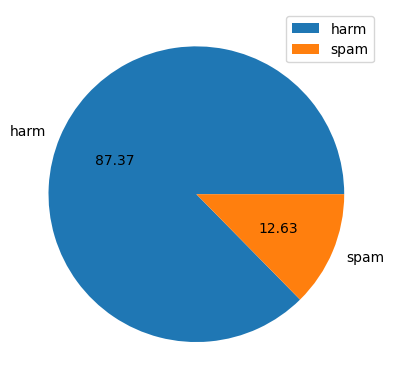

In [19]:
plt.pie(category, labels=['harm','spam'], autopct="%0.2f")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Spam Count')

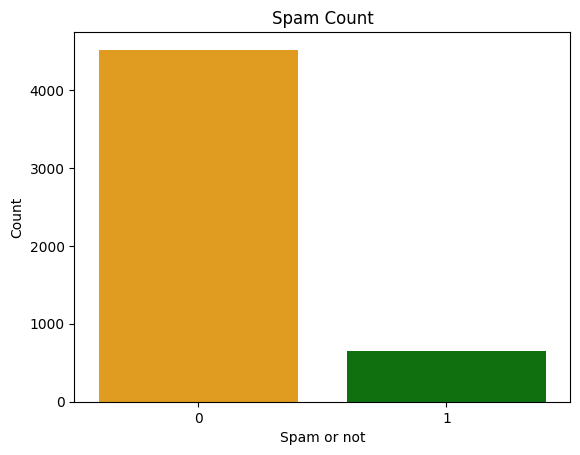

In [20]:
c = ['orange','green']
sns.countplot(data=df, x='Category', palette=c)
plt.xlabel("Spam or not")
plt.ylabel("Count")
plt.title("Spam Count")

<ipython-input-21-fb0cac090329>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-21-fb0cac090329>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

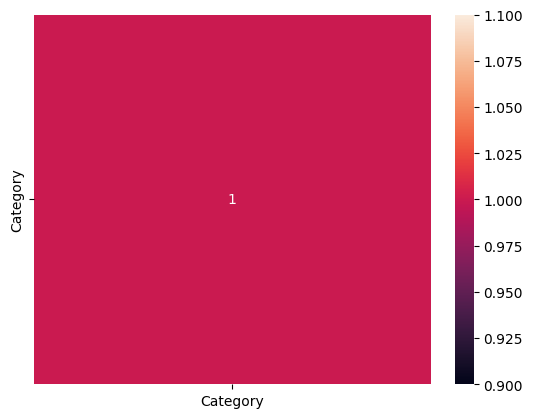

In [21]:
# Correlation
df.corr()
sns.heatmap(df.corr(), annot=True)

## **Spliting the Data into Train and Test**

In [22]:
X = df["Text"]
y = df["Category"]

In [23]:
print(X,"\n\n",y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object 

 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int64


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
print("X",X.shape, "X_train",X_train.shape, "X_test",X_test.shape,"\n")
print("y",y.shape, "y_train", y_train.shape, "y_test",y_test.shape)

X (5169,) X_train (4135,) X_test (1034,) 

y (5169,) y_train (4135,) y_test (1034,)


## **Extract the Features**

#### **TfidfVectorizer is a type of feature extraction**
- It is a very popular technique for transforming text data into a numerical representation that can be used by machine learning algorithms.
- TfidfVectorizer works by first calculating the term frequency (TF) and inverse document frequency (IDF) for each word in the text corpus. TF measures the number of times a word appears in a document, while IDF measures how important a word is to the corpus as a whole.
- The TF-IDF score for a word is calculated by multiplying the TF and IDF scores.

In [69]:
# Stop_words are a set of commonly used words in a language that are often removed from text data before ml algorithms are applied.
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

print(X_train,X_train_feature)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Text, Length: 4135, dtype: object   (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)

In [71]:
#Test data in Vectorized form
print(X_test,X_test_feature)

1617                        Did u download the fring app?
2064    Pass dis to all ur contacts n see wat u get! R...
1272                                                Ok...
3020                       Am in film ill call you later.
3642    Sorry, left phone upstairs. OK, might be hecti...
                              ...                        
4146    Pls help me tell sura that i'm expecting a bat...
1208                      Also maaaan are you missing out
4795    URGENT This is our 2nd attempt to contact U. Y...
3575    The sign of maturity is not when we start sayi...
2820                Oh god..taken the teeth?is it paining
Name: Text, Length: 1034, dtype: object   (0, 2350)	0.6248448031170994
  (0, 2218)	0.41649895656656905
  (0, 969)	0.6603768554367367
  (1, 7209)	0.206445043140504
  (1, 7151)	0.33592749605615635
  (1, 7052)	0.11915863336196834
  (1, 7030)	0.16796374802807817
  (1, 6867)	0.09539871110957399
  (1, 6550)	0.18453673975730422
  (1, 6365)	0.18017747272491885
  (1, 5

## **Train a Model**

In [65]:
# RandomForest Classifier
model = RandomForestClassifier()
model.fit(X_train_feature,y_train)

RandomForestClassifier()

## **Model Evaluation**

In [72]:
y_test_pred = model.predict(X_test_feature)
print("Testing Score:",accuracy_score(y_test,y_test_pred))

print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("r2_score:",r2_score(y_test,y_test_pred))
print("classification_report:\n",classification_report(y_test,y_test_pred))


Testing Score: 0.971953578336557
mean_absolute_error: 0.02804642166344294
mean_squared_error: 0.02804642166344294
r2_score: 0.7673790776152981
classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



## **Email Checking**

In [73]:
def spamchecking(mail):
  input = feature_extraction.transform(mail)
  prediction = model.predict(input)

  if prediction == 1:
    return "Email is Spam"
  else:
    return "Email is not Spam"


In [74]:
mail1 = ["These brand new domain extensions were recently approved by ICANN and have the same rights as the original .COM and .NET domain names. The biggest benefit is of-course that the .BIZ and .INFO domain names are currently more available. i.e. it will be much easier to register an attractive and easy-to-remember domain name for the same price.  Visit: http://www.affordable-domains.com today for more info."]
print(spamchecking(mail1))

Email is Spam


In [75]:
mail2 = ["""As a Bachelor of Engineering (B.E) student from your college you can EARN huge rewards by joining the Internshala Student Partner program while LEARNING real-world skills like leadership, communication & networking!
Rewards - Win MEGA giveaways such as an iPhone 13 , BoAt SoundBar, Noise Smart Eyewear, Free Internshala Trainings and more.
What's more - 5+ Masterclasses & 15+ exciting contests that come with cash rewards worth INR 7 Lacs+
Eligibility - Any student from any degree, stream, and year of study can apply.
"""]

print(spamchecking(mail2))

Email is not Spam
